In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.chdir('C:\\Users\\Poorna\\Desktop\\SYNXA\\Chicago_Crimes_2001_to_2004.csv')

In [3]:
data=pd.read_csv('Chicago_Crimes_2001_to_2004.csv')
data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,1/1/2004 0:01,082XX S COLES AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,6,NaN,NaN,2004,8/17/2015 15:03,NaN,NaN,NaN
1,2544,4676906,HM278933,3/1/2003 0:00,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003,4/15/2016 8:55,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,6/20/2004 11:00,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004,8/17/2015 15:03,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 20:00,045XX W MONTANA ST,840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,6,NaN,NaN,2004,8/17/2015 15:03,NaN,NaN,NaN
4,3302,4677901,HM275615,5/1/2003 1:00,111XX S NORMAL AVE,841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,6,1174948.0,1831051.0,2003,4/15/2016 8:55,41.691785,-87.635116,"(41.691784636, -87.635115968)"


In [4]:
data = data.dropna()
data = data.drop(columns=['Unnamed: 0', 'ID', 'Case Number', 'Block', 'IUCR','Domestic', 'Beat', 'District', 'Ward','X Coordinate', 'Y Coordinate','Updated On', 'FBI Code'], axis = 1)

In [5]:
data.isnull().sum()


Date                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Community Area          0
Year                    0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [6]:
#data.index = pd.to_datetime(data.index)
#data.head()

# Location Description

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

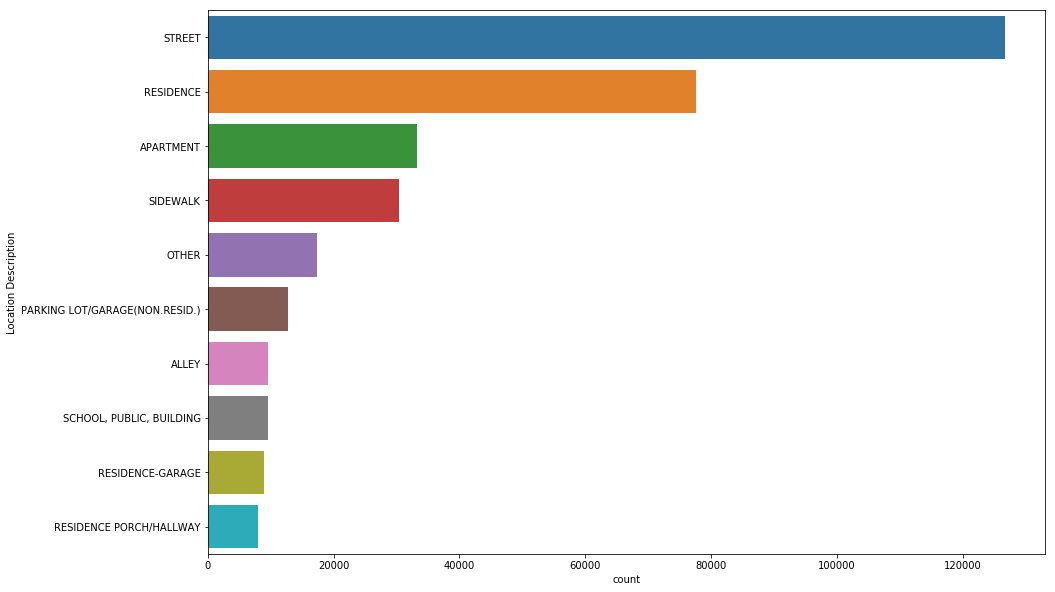

In [8]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = data, order = data['Location Description'].value_counts().iloc[:10].index)

# Preparing the first map.
Using one location each in a particular community area

In [9]:
import folium

In [10]:
chicago_map = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11,
                        tiles="CartoDB dark_matter")

In [11]:
locations = data.groupby('Community Area').first()


In [12]:
new_locations = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]

In [13]:
new_locations.head()

,Latitude,Longitude,Location Description,Arrest
Community Area,,,,
0.0,41.881537,-87.616595,STREET,False
1.0,42.001679,-87.660604,"SCHOOL, PRIVATE, GROUNDS",True
2.0,41.998765,-87.683672,APARTMENT,False
3.0,41.966409,-87.648852,STREET,False
4.0,41.978354,-87.692456,MEDICAL/DENTAL OFFICE,False


In [14]:
popup_text = """Community Index : {}<br
                Arrest : {}<br>
                Location Description : {}<br>"""

In [15]:
for i in range(len(new_locations)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(chicago_map)

In [16]:
chicago_map

In [17]:
unique_locations = data['Location'].value_counts()
unique_locations.head()

(41.976290414, -87.905227221)    1338
(41.754592961, -87.741528537)     811
(41.883500187, -87.627876698)     382
(41.814007401, -87.628331665)     381
(41.736148121, -87.629070243)     337
Name: Location, dtype: int64

In [18]:
unique_locations.index

Index(['(41.976290414, -87.905227221)', '(41.754592961, -87.741528537)',
       '(41.883500187, -87.627876698)', '(41.814007401, -87.628331665)',
       '(41.736148121, -87.629070243)', '(41.876059649, -87.68938138)',
       '(41.901422057, -87.718953928)', '(41.820921514, -87.628541987)',
       '(41.874363279, -87.643013039)', '(41.876884977, -87.686329083)',
       ...
       '(41.976601175, -87.807021049)', '(41.935423998, -87.72687132)',
       '(41.958841206, -87.672331086)', '(41.810838097, -87.595610047)',
       '(41.835846787, -87.640135516)', '(41.975340963, -87.805093348)',
       '(41.855992946, -87.627162293)', '(41.707872717, -87.648939111)',
       '(41.734684761, -87.671908646)', '(41.877800461, -87.633719047)'],
      dtype='object', length=182666)

# A simple Criminal Rate Index DataFrame

In [19]:
CR_index = pd.DataFrame({"Raw_String" : unique_locations.index, "ValueCount":unique_locations})
CR_index.index = range(len(unique_locations))
CR_index.head()


,Raw_String,ValueCount
0,"(41.976290414, -87.905227221)",1338
1,"(41.754592961, -87.741528537)",811
2,"(41.883500187, -87.627876698)",382
3,"(41.814007401, -87.628331665)",381
4,"(41.736148121, -87.629070243)",337


In [20]:
def Location_extractor(Raw_Str):
    preProcess = Raw_Str[1:-1].split(',')
    lat =  float(preProcess[0])
    long = float(preProcess[1])
    return (lat, long)

In [21]:
CR_index['LocationCoord'] = CR_index['Raw_String'].apply(Location_extractor)


In [22]:
CR_index  = CR_index.drop(columns=['Raw_String'], axis = 1)

# A Simple Chicago Mapping showing the total criminal rates.
( As per the number of total criminal rates)

In [23]:


chicago_map_crime = folium.Map(location=[41.895140898, -87.624255632],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

for i in range(500):
    lat = CR_index['LocationCoord'].iloc[i][0]
    long = CR_index['LocationCoord'].iloc[i][1]
    radius = CR_index['ValueCount'].iloc[i] / 45
    
    if CR_index['ValueCount'].iloc[i] > 1000:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               CR_index['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(chicago_map_crime)

In [24]:
chicago_map_crime

# take a important feature

In [25]:
data['Primary Type'].value_counts()

THEFT                               86583
BATTERY                             81779
CRIMINAL DAMAGE                     48017
NARCOTICS                           42566
OTHER OFFENSE                       28183
ASSAULT                             27379
BURGLARY                            23084
MOTOR VEHICLE THEFT                 21881
ROBBERY                             15865
CRIMINAL TRESPASS                   12276
DECEPTIVE PRACTICE                  12021
PROSTITUTION                         5176
WEAPONS VIOLATION                    3614
OFFENSE INVOLVING CHILDREN           2241
PUBLIC PEACE VIOLATION               2128
SEX OFFENSE                          1915
HOMICIDE                             1701
CRIM SEXUAL ASSAULT                  1584
LIQUOR LAW VIOLATION                 1205
GAMBLING                              837
ARSON                                 831
KIDNAPPING                            675
INTERFERENCE WITH PUBLIC OFFICER      322
INTIMIDATION                      

# 1. Having a closer look at the thefts

In [26]:
df_theft = data[data['Primary Type'] == 'THEFT']

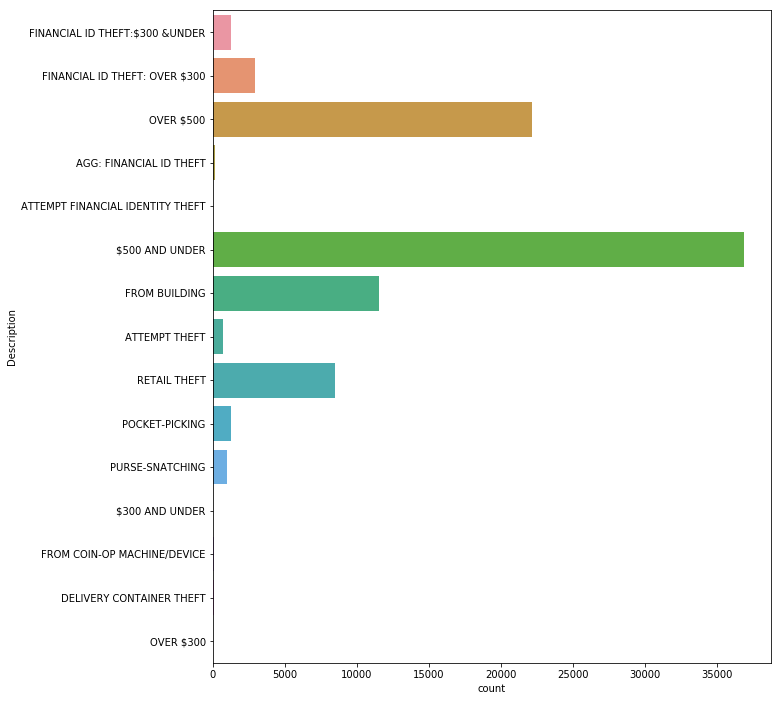

In [27]:
import matplotlib.pyplot
from matplotlib.pyplot import figure
sns.countplot(y = df_theft['Description'])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 12)
fig.savefig('test2png.png', dpi=100)


In [28]:
df_theft_data = pd.DataFrame({"Counts": df_theft['Description'].value_counts(), "Description" : df_theft['Description'].value_counts().index})

In [29]:
df_theft_data.reset_index(inplace=True)

In [30]:
df_theft_data = df_theft_data.drop(columns=['index'], axis = 1)
df_theft_data.head()

,Counts,Description
0,36896,$500 AND UNDER
1,22145,OVER $500
2,11566,FROM BUILDING
3,8478,RETAIL THEFT
4,2909,FINANCIAL ID THEFT: OVER $300


In [31]:
data['Date'] = pd.to_datetime(data['Date'])

In [32]:
data['Month'] = data['Date'].apply(lambda x : x.month)

In [33]:
theft_in_months = pd.DataFrame({"thefts" : data['Month'].value_counts(), "month" : data["Month"].value_counts().index}, index = range(12))

In [34]:
theft_in_months.fillna(0, inplace=True)
theft_in_months = theft_in_months.sort_values(['month'], ascending=[1])

In [35]:
theft_in_months.head()

,thefts,month
8,43381.0,1
9,41563.0,2
11,35729.0,3
10,41926.0,4
2,31781.0,5


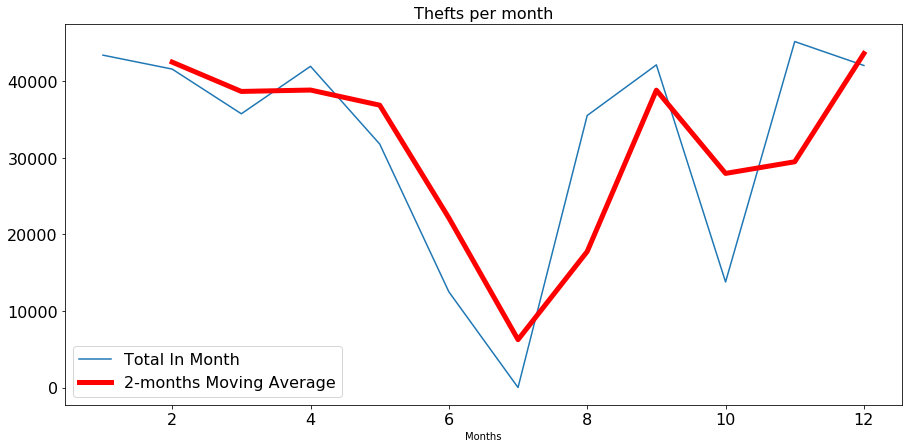

In [36]:
plt.figure(figsize = (15,7))
plt.plot(theft_in_months['month'],theft_in_months['thefts'], label = 'Total In Month')
plt.plot(theft_in_months['month'],theft_in_months['thefts'].rolling(window = 2).mean(),color='red', linewidth=5, label='2-months Moving Average' )

plt.title('Thefts per month', fontsize=16)
plt.xlabel('Months')
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16)

# 2. Having a look at Public Peace Violations

In [37]:
df_public_peace =  data[data['Primary Type'] == 'PUBLIC PEACE VIOLATION']

In [38]:
df_public_data = pd.DataFrame({"Counts": df_public_peace['Description'].value_counts(), "Description" : df_public_peace['Description'].value_counts().index})
df_public_data.reset_index(inplace=True)
df_public_data = df_public_data.drop(columns=['index'], axis = 1)
df_public_data.head()

,Counts,Description
0,709,BOMB THREAT
1,557,RECKLESS CONDUCT
2,478,ARSON THREAT
3,165,FALSE POLICE REPORT
4,82,PEEPING TOM


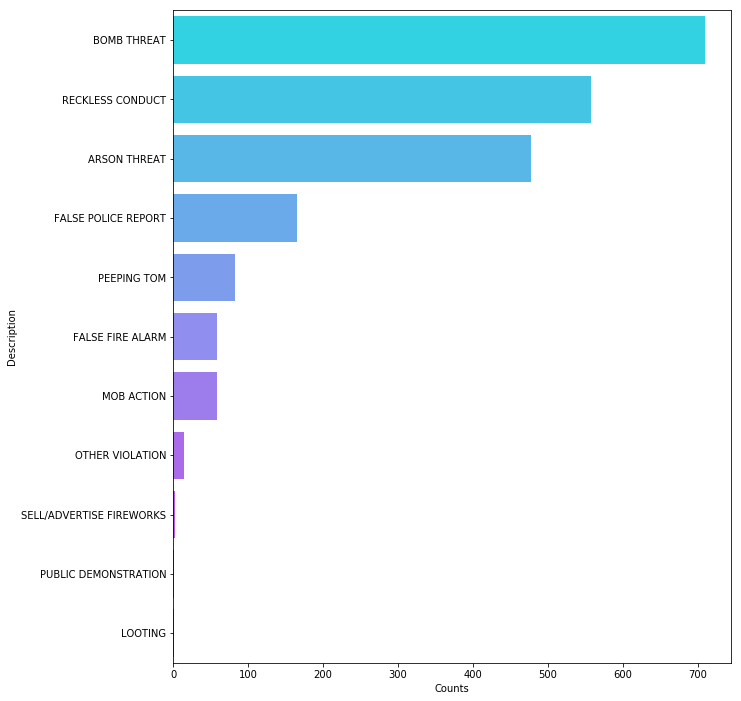

In [39]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 12)
fig.savefig('test2png.png', dpi=100)
sns.barplot(y ="Description", x = "Counts", data = df_public_data, palette="cool")

In [40]:
#data.Date = pd.to_datetime(data.Date, format = '%d/%m/%Y:%M:%S')
#data.index = pd.DatetimeIndex(data.Date)

# Analysis of crime

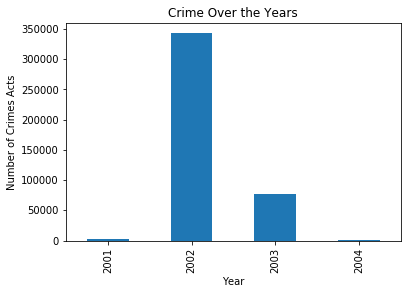

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

In [41]:
import matplotlib.pyplot as plt
data.groupby([data.Year]).size().plot.bar()
plt.title('Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes Acts')
plt.show()
plt.figure(figsize = (8,5))

#  which crime members were arrested as represented in plots

In [42]:
b = pd.DataFrame(data ,columns=['Primary Type','Arrest'])

In [43]:
crime_count1 = pd.DataFrame(b.groupby(['Primary Type','Arrest']).size().sort_values(ascending=False).rename('counts').reset_index())
crime_count1

,Primary Type,Arrest,counts
0,THEFT,False,74845
1,BATTERY,False,63095
2,CRIMINAL DAMAGE,False,44259
3,NARCOTICS,True,42559
4,OTHER OFFENSE,False,23340
5,BURGLARY,False,21612
6,ASSAULT,False,20904
7,MOTOR VEHICLE THEFT,False,19211
8,BATTERY,True,18684
9,ROBBERY,False,14378


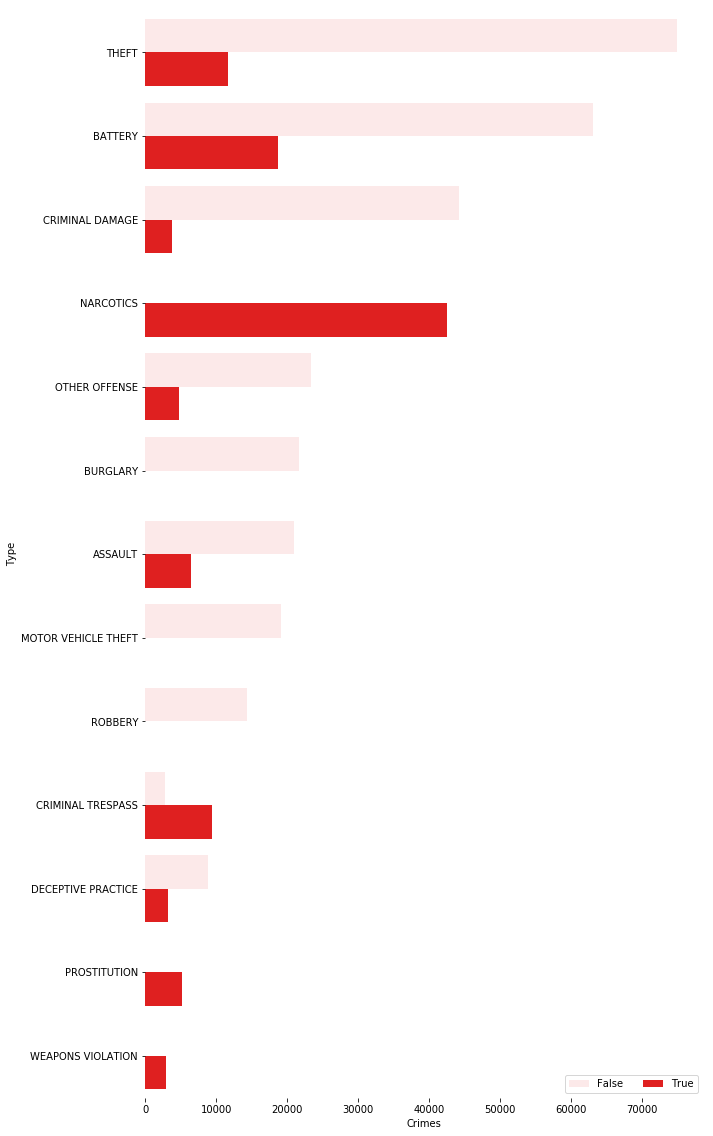

In [44]:
#here,i've plotted the entities of primary type  and arrest section in form of bar plot to find the result on criminal activity
#in the graph red color implies to "Arrest" and other color implies  to "NOt arrested" which help us to show how effective fbi is working
import seaborn as sns
import matplotlib.pyplot as plt


f, ax = plt.subplots(figsize=(10,20))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot( y="Primary Type",x="counts" , data=crime_count1.iloc[:20, :], hue='Arrest', color='red')

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",xlabel="Crimes")
sns.despine(left=True, bottom=True)

#highest rate of crime is done on street,residence,apartment and sidewalk

# #plot of the relatives amounts of each type of crime

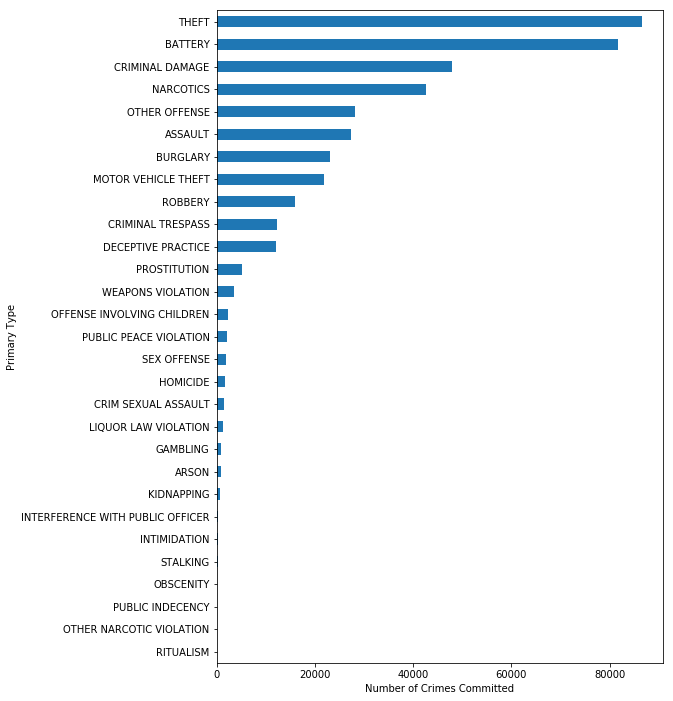

In [45]:

plt.figure(figsize = (8,12))
data.groupby(data['Primary Type']).size().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel('Number of Crimes Committed')
plt.show()